# Exercise 3

We generate the same noisy dataset as last time:

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


## Plotting the data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

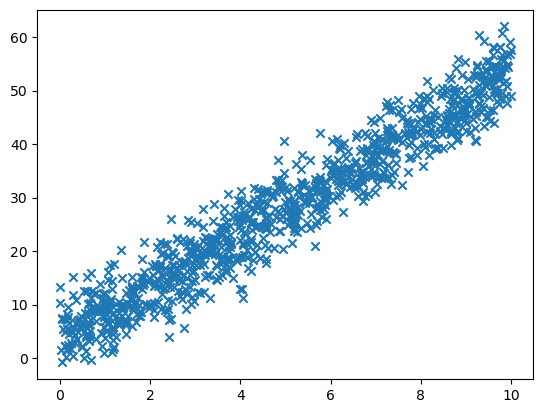

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Setup code

We add an additional column for the bias to the dataset (as per usual):

In [5]:
X_ = np.c_[X, np.ones((X.shape[0]))]

We initialize a weight matrix with random values:

In [6]:
num_samples = X_.shape[0]
num_features = X_.shape[1]

np.random.seed(42)
initial_weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

Here is again the code to load the data in chunks / batches:

In [7]:
from math import ceil

BATCH_SIZE = 100
NUM_BATCHES = int(ceil(float(num_samples)/BATCH_SIZE))

def Loader():
    # This generates the batches, one after another
    # For a large dataset, we could load data from disk here
    for i in range(NUM_BATCHES):
        # Get the i'th slice of data
        batch_X = X_[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        batch_y = y[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
        yield batch_X, batch_y

# Tasks
Below, you can find an implementation of stochastic gradient descent (the same as in the `exerscise3_sgd.ipynb` notebook).

Your task in this exercise is to adjust the code by implementing other optimizers:
 - SGD with a momentum of 0.3 (add the momentum term to the existing code)
 - SGD with Nesterov momentum of 0.3 (change the code to use nesterov momentum)
 - Adagrad with a learning rate of 0.1 and $\epsilon=10^{-10}$
 - RMSprop with a learning rate of 0.01, $\rho=0.99$ and $\epsilon=10^{-8}$
 - Adadelta with a learning rate of 1, $\rho=0.9$ and $\epsilon=10^{-6}$
 - Adam with a learning rate of 0.01, $\beta_1=0.9$, $\beta_2=0.999$ and $\epsilon=10^{-8}$

For that, save a copy of this file for each individual optimizer. Adapt the code for the optimizer to implement. The last cell of the notebook writes the loss values of each epoch to a file, which can then be loaded and visualized using the `exercise3_optimizers_comparison.ipynb` notebook. Adjust the value of the `optimizer_name` and `optimizer_count` variables below for each optimizer that you implement, so that the loss curves are not overwritten by the different notebooks.

PS: Of course, implement the optimizers manually and do not just use `torch.optim.*` classes, that would defeat the purpose ;-)
You can use `torch.optim.*` classes as a reference of what the correct result would be, or you can just compare your results to the image in `exercise3_optimizers_comparison.ipynb`, which shows the correct results (the same that you would obtain from using the pytorch optimizers).

# SGD with a momentum of 0.3 (add the momentum term to the existing code)

epoch 1 loss: 520.5316525340791
epoch 100 loss: 15.144510424363228
epoch 200 loss: 14.983534794615274
epoch 300 loss: 14.944993987624784
[[4.99250919]
 [3.09109965]]


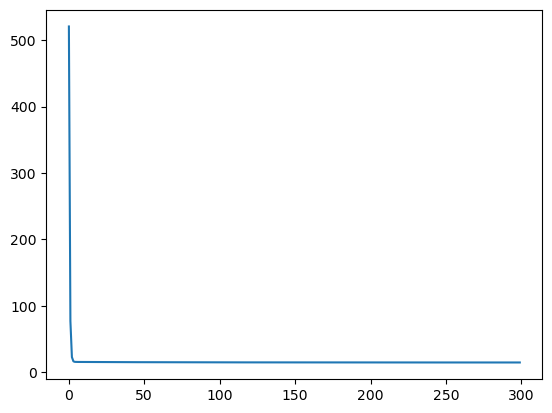

In [8]:
import glob
import pickle

momentum = 0.3


LR = 0.001


weights = initial_weights.copy()
losses_sgd_momentum = []
v = np.zeros_like(weights)

for epoch in range(1, 301):
    total_loss = 0

    for batch_X, batch_y in Loader():
        num_batch_samples = len(batch_y)
        prediction = batch_X @ weights
        error = batch_y - prediction
        L = np.square(error).sum() / num_batch_samples
        gradient = -2.0 / num_batch_samples * batch_X.T @ (batch_y - prediction)

       
        v = momentum * v + LR * gradient
        weights -= v

        total_loss += L.item() * num_batch_samples

    epoch_loss = total_loss / num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    losses_sgd_momentum.append(epoch_loss)

print(weights)

plt.plot(losses_sgd_momentum)
plt.show()


In [9]:

optimizer_name = "sgd_momentum"
optimizer_count = 2
with open(f"{optimizer_count}_{optimizer_name}.pickle", "wb") as f:
    pickle.dump(losses_sgd_momentum, f)
    

# SGD with Nesterov momentum of 0.3 (change the code to use nesterov momentum)

In [ ]:
import glob
import pickle


momentum = 0.3


LR = 0.001

weights = initial_weights.copy()
v = np.zeros_like(weights)


losses_sgd_nesterov = []

for epoch in range(1, 301):
    total_loss = 0

    for batch_X, batch_y in Loader():
        num_batch_samples = len(batch_y)

        # Update weights using Nesterov momentum
        weights_ahead = weights - momentum * v
        prediction = batch_X @ weights_ahead
        error = batch_y - prediction
        L = np.square(error).sum() / num_batch_samples
        gradient = -2.0 / num_batch_samples * batch_X.T @ (batch_y - prediction)

        # Add momentum term
        v = momentum * v + LR * gradient
        weights -= v

        total_loss += L.item() * num_batch_samples

    epoch_loss = total_loss / num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    losses_sgd_nesterov.append(epoch_loss)

    
print(weights)

plt.plot(losses_sgd_nesterov)
plt.show()


In [ ]:

optimizer_name = "sgd_nesterov"
optimizer_count = 3
with open(f"{optimizer_count}_{optimizer_name}.pickle", "wb") as f:
    pickle.dump(losses_sgd_nesterov, f)

# Adagrad with a learning rate of 0.1 and  𝜖=10−10

In [ ]:
import glob
import pickle

Stabilizer_term = 1e-10
LR = 0.1

weights = initial_weights.copy()
G = np.zeros_like(weights)


losses_adagrad = []

for epoch in range(1, 301):
    total_loss = 0

    for batch_X, batch_y in Loader():
        num_batch_samples = len(batch_y)
        prediction = batch_X @ weights
        error = batch_y - prediction
        L = np.square(error).sum() / num_batch_samples
        gradient = -2.0 / num_batch_samples * batch_X.T @ (batch_y - prediction)

     
        G += np.square(gradient)

        
        weights -= LR / (np.sqrt(G) + Stabilizer_term) * gradient

        total_loss += L.item() * num_batch_samples

    epoch_loss = total_loss / num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    losses_adagrad.append(epoch_loss)

print(weights)

plt.plot(losses_adagrad)
plt.show()

In [ ]:

optimizer_name = "adagrad"
optimizer_count = 4
with open(f"{optimizer_count}_{optimizer_name}.pickle", "wb") as f:
    pickle.dump(losses_adagrad, f)


# RMSprop with a learning rate

In [ ]:
import glob
import pickle



rho = 0.99
epsilon = 1e-8
LR = 0.01


weights = initial_weights.copy()
G = np.zeros_like(weights)


loss_rmsprop = []

for epoch in range(1, 301):
    total_loss = 0

    for batch_X, batch_y in Loader():
        num_batch_samples = len(batch_y)
        prediction = batch_X @ weights
        error = batch_y - prediction
        L = np.square(error).sum() / num_batch_samples
        gradient = -2.0 / num_batch_samples * batch_X.T @ (batch_y - prediction)

        # Update G (squared gradient accumulator)
        G = rho * G + (1 - rho) * np.square(gradient)

        # Update weights
        weights -= LR / (np.sqrt(G) + epsilon) * gradient

        total_loss += L.item() * num_batch_samples

    epoch_loss = total_loss / num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    loss_rmsprop.append(epoch_loss)


print(weights)

plt.plot(loss_rmsprop)
plt.show()

In [ ]:

optimizer_name = "rmsprop"
optimizer_count = 5
with open(f"{optimizer_count}_{optimizer_name}.pickle", "wb") as f:
    pickle.dump(loss_rmsprop, f)

# Adadelta with a learning rate of 1 

In [ ]:
import pickle


rho = 0.9
epsilon = 1e-6

weights = initial_weights.copy()
E_g = np.zeros_like(weights)
E_delta = np.zeros_like(weights)


losses_adadelta = []

for epoch in range(1, 301):
    total_loss = 0

    for batch_X, batch_y in Loader():
        num_batch_samples = len(batch_y)
        prediction = batch_X @ weights
        error = batch_y - prediction
        L = np.square(error).sum() / num_batch_samples
        gradient = -2.0 / num_batch_samples * batch_X.T @ (batch_y - prediction)

        # Update exponential moving average of squared gradients
        E_g = rho * E_g + (1 - rho) * np.square(gradient)

        # Compute update
        delta = -np.sqrt(E_delta + epsilon) / np.sqrt(E_g + epsilon) * gradient

        # Update exponential moving average of squared updates
        E_delta = rho * E_delta + (1 - rho) * np.square(delta)

        # Update weights
        weights += delta

        total_loss += L.item() * num_batch_samples

    epoch_loss = total_loss / num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    losses_adadelta.append(epoch_loss)

print(weights)

plt.plot(losses_adadelta)
plt.show()

In [ ]:

optimizer_name = "adadelta"
optimizer_count = 6
with open(f"{optimizer_count}_{optimizer_name}.pickle", "wb") as f:
    pickle.dump(losses_adadelta, f)

# Adam with a learning rate of 0.01

In [ ]:


import pickle

beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
LR = 0.01

num_samples = X_.shape[0]
num_features = X_.shape[1]

np.random.seed(42)
initial_weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)
weights = initial_weights.copy()
m = np.zeros_like(weights)  # First moment estimate
v = np.zeros_like(weights)  # Second moment estimate
t = 0  # Timestamp

loss_adam = []

for epoch in range(1, 301):
    total_loss = 0

    for batch_X, batch_y in Loader():
        t += 1
        num_batch_samples = len(batch_y)
        prediction = batch_X @ weights
        error = batch_y - prediction
        L = np.square(error).sum() / num_batch_samples
        gradient = -2.0 / num_batch_samples * batch_X.T @ (batch_y - prediction)

        
        m = beta1 * m + (1 - beta1) * gradient

        
        v = beta2 * v + (1 - beta2) * np.square(gradient)

      
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

      
        weights -= LR * m_hat / (np.sqrt(v_hat) + epsilon)

        total_loss += L.item() * num_batch_samples

    epoch_loss = total_loss / num_samples
    if epoch == 1 or epoch % 100 == 0:
        print(f"epoch {epoch} loss: {epoch_loss}")
    loss_adam.append(epoch_loss)
    
    
print(weights)

plt.plot(loss_adam)
plt.show()


In [ ]:

optimizer_name = "adam"
optimizer_count = 7
with open(f"{optimizer_count}_{optimizer_name}.pickle", "wb") as f:
    pickle.dump(loss_adam, f)